In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# load data
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.cifar10.load_data()

# preprocess
img_rows, img_cols = 32, 32
num_classes=10
train_dataset = TrainIn.astype('float32')
test_dataset = TestIn.astype('float32')
train_dataset /= 255
test_dataset /= 255
print('train_dataset shape:', TrainIn.shape)
print(TrainIn.shape[0], 'train samples')
print(TestIn.shape[0], 'test samples')

# set labels
train_labels = keras.utils.to_categorical(TrainOut, num_classes)
test_labels = keras.utils.to_categorical(TestOut, num_classes)

train_dataset shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# train model
str_optimizer = 'adam'
str_loss = 'categorical_crossentropy'

# define, compile and fit the model
model_cifar10=Sequential()
model_cifar10.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model_cifar10.add(Conv2D(32,(3,3), activation='relu'))
model_cifar10.add(MaxPooling2D(pool_size=(2,2)))
model_cifar10.add(Conv2D(64,(3,3), activation='relu'))
model_cifar10.add(Conv2D(64,(3,3), activation='relu'))
model_cifar10.add(MaxPooling2D(pool_size=(2,2)))
model_cifar10.add(Flatten())
model_cifar10.add(Dense(10, activation='softmax'))

model_cifar10.compile(loss=str_loss, optimizer=str_optimizer, metrics=['accuracy'])
TrainingLog=model_cifar10.fit(train_dataset, train_labels, epochs=10, validation_split = 0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 67ms/step - accuracy: 0.3749 - loss: 1.7042 - val_accuracy: 0.5822 - val_loss: 1.1884
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 65ms/step - accuracy: 0.6008 - loss: 1.1331 - val_accuracy: 0.6578 - val_loss: 0.9876
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 145s 67ms/step - accuracy: 0.6691 - loss: 0.9397 - val_accuracy: 0.6778 - val_loss: 0.9162
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 66ms/step - accuracy: 0.7103 - loss: 0.8269 - val_accuracy: 0.7148 - val_loss: 0.8342
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 90s 64ms/step - accuracy: 0.7430 - loss: 0.7378 - val_accuracy: 0.7136 - val_loss: 0.8452
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 65ms/step - accuracy: 0.7668 - loss: 0.6710 - val_accuracy: 0.7338 - val_loss: 0.7875
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.7848 - loss: 0.6255 - val_accuracy: 0.7464 - val_loss: 0.7621
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.79

In [ ]:
# finding the gradients of sample 0
sample_index = 0
sample_image = tf.expand_dims(train_dataset[sample_index], axis=0)
sample_label = tf.expand_dims(train_labels[sample_index], axis=0)

# using TensorFlow's GradientTape
with tf.GradientTape() as tape:
    # Watch the input tensor instead of trainable_variables
    tape.watch(sample_image)
    predictions = model_cifar10(sample_image)
    loss = tf.keras.losses.categorical_crossentropy(sample_label, predictions)

# compute the gradients
gradients = tape.gradient(loss, model_cifar10.trainable_variables)

# output
print(f"Gradients for the first layer's weight: \n{gradients[0]}")
print(f"\n\nGradients for the first layer's bias: \n{gradients[1]}")

Gradients for the first layer's weight: 
[[[[-5.94267715e-03  7.21103000e-03 -3.15302499e-02 -5.93740307e-03
     5.83920488e-03 -3.24466825e-03  0.00000000e+00  4.99656470e-03
     4.23945906e-03  1.42539944e-02  1.88728590e-02 -1.39652817e-02
     5.57505246e-03  0.00000000e+00  0.00000000e+00 -1.18693933e-02
    -2.59591127e-03  1.28395250e-03 -5.61525906e-03 -1.15811797e-02
     0.00000000e+00  0.00000000e+00 -1.87210161e-02  2.34825313e-02
     6.60895929e-03 -2.51075011e-02 -1.19620272e-05 -5.52344951e-04
     2.59676203e-03  0.00000000e+00 -4.13538422e-03  0.00000000e+00]
   [-5.46810497e-03  8.40898976e-03 -2.25930531e-02 -4.86888411e-03
     6.85011130e-03 -3.43130110e-03  0.00000000e+00  4.59053507e-03
     3.40539124e-03  1.15092071e-02  1.65377352e-02 -1.07624251e-02
     4.82661417e-03  0.00000000e+00  0.00000000e+00 -8.72919243e-03
    -1.71928224e-03  2.37103365e-03 -4.21975879e-03 -9.45476070e-03
     0.00000000e+00  0.00000000e+00 -1.39081944e-02  1.96964331e-02
     5

In [ ]:
# implementing the Gradient Descent Rule to update model's weights.
learning_rate = 0.01

updated_weights = []
# update weights
for i, weight in enumerate(model_cifar10.trainable_variables):
    updated_weight = weight - learning_rate * gradients[i]
    updated_weights.append(updated_weight)

for i, weight in enumerate(model_cifar10.trainable_variables):
  weight.assign(updated_weights[i])

print(f"Updated weights for the first layer: \n{model_cifar10.trainable_variables[0]}")

Updated weights for the first layer: 
<Variable path=sequential/conv2d/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[-0.03901122  0.15731646  0.05234773  0.17533259  0.1943442
    -0.19094712 -0.28767115  0.0567086   0.00924778 -0.18855909
    -0.13724597  0.08919009 -0.0625014  -0.07422014  0.00137031
     0.14472382 -0.15895942 -0.00165406 -0.06525595  0.04205723
    -0.14845923 -0.11261155  0.22601545 -0.04868577  0.03144307
    -0.02195577 -0.08448093 -0.12831144  0.197019    0.11188118
    -0.09355234  0.01352884]
   [ 0.05700243 -0.03617252 -0.06397679  0.14434586 -0.15193328
    -0.29274744 -0.35216048  0.10910292  0.0690015  -0.00582031
     0.04699468 -0.11131567  0.06680608  0.02608465 -0.13730824
    -0.05866164  0.13237505  0.17874284 -0.1005924   0.16726674
    -0.11386572  0.10471491 -0.10088828 -0.00905451  0.21317917
     0.07683083 -0.1279143  -0.01116202  0.1116679  -0.00364973
     0.01855492  0.1177528 ]
   [ 0.15139546 -0.01113952  0.15673979  0.03311517  0

# Task 2
- Objective: Develop RNN model to accurately predict the next value of a sine wave sequence.
- Steps:
    1. Generate the sine wave
    2. Preprocess the data
    3. Design the RNN
    4. Choose appropriate activation and loss function (+NOTE)
    5. Split the dataset into training and testing
    6. Set a metric to evaluate model performance
    7. Visualize model's predictions against ground truth
    8. Interpret the model's predictions

# 2.1 Generate the sine wave
- Seeing the hint, I used np.linspace to generate the dataset.

In [ ]:
# 2.1 generate the sine wave
dataset = np.sin(np.linspace(0,100,1000))

# 2.2 Preprocess the data
- X stores sequences of seq_length and data.
- y stores next value in data, after each sequence
- convert to arrays
- perform usual reshaping with 1 feature (sine wave)

# 2.5 Data split
- 80% Training
- 20% Testing

In [ ]:
# 2.2 preprocess the data
def lstm_preprocess(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    X = np.array(X)
    y = np.array(y)
    return X, y

seq_length = 50
X, y = lstm_preprocess(dataset, seq_length)

# reshape for the RNN: (samples, timesteps, features)
# this is the usual final step
X = X.reshape(X.shape[0], X.shape[1], 1)

# 2.5 data split: 80% for training, 20% for testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 2.3 Design model
- I designed a basic RNN with 3 layers total
# 2.4 Activation and loss function
- Try 1:  Activation function: **Adagrad**
- Try 2: Activation function: **Adam**
- Try 1 & 2: Loss function: **Mean Squared Error** it's a regression problem.
# 2.6 Metric to evaluate model performance
- **Mean Squared Error**: Since it's a regression problem, accuracy isn't suitable.

In [ ]:
# TRY 1
# 2.3 Design the RNN
model_sinewave = keras.Sequential()
model_sinewave.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_sinewave.add(keras.layers.LSTM(units=50))
model_sinewave.add(keras.layers.Dense(units=1))

# 2.4 Activation function: Adagrad, Loss function: Mean Squared Error
model_sinewave.compile(optimizer='adagrad', loss='mse')

# 2.6 Set a metric to evaluate model performance
# MSE is the metric
# 2.7 train the model
# supressed the output
model_sinewave.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# 2.8 evaluate model performance
loss = model_sinewave.evaluate(X_test, y_test)
print("Test Loss:", loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2125 
Test Loss: 0.2129431515932083


# 2.4 Visualize
- Activation Function: Adagrad

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


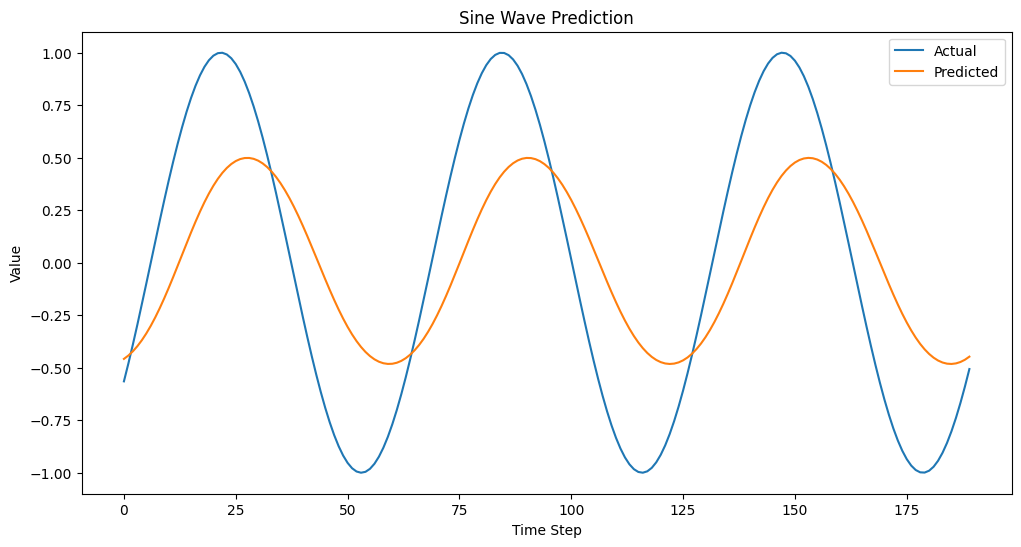

In [ ]:
# 2.8 Visualize model's predictions against ground truth
predictions = model_sinewave.predict(X_test)

time_steps = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(time_steps, y_test, label='Actual')
plt.plot(time_steps, predictions, label='Predicted')
plt.legend()
plt.title('Sine Wave Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [ ]:
# TRY 2
# Try 2: Activation  Function: Adam
model_sinewave = keras.Sequential()
model_sinewave.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_sinewave.add(keras.layers.LSTM(units=50))
model_sinewave.add(keras.layers.Dense(units=1))

# 2.4 Activation function: Adam, Loss function: Mean Squared Error
model_sinewave.compile(optimizer='adam', loss='mse')

# 2.6 Set a metric to evaluate model performance
# MSE is the metric
# 2.7 train the model
model_sinewave.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# 2.8 evaluate model performance
loss = model_sinewave.evaluate(X_test, y_test)
print("Test Loss:", loss)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0162e-06 
Test Loss: 4.177223672741093e-06


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


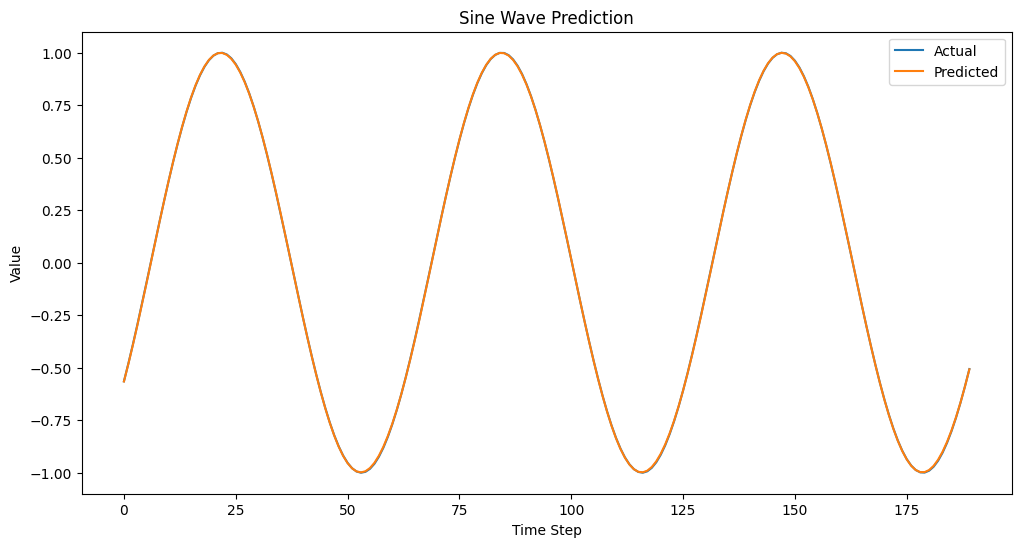

In [ ]:
# 2.8 Visualize model's predictions against ground truth
predictions = model_sinewave.predict(X_test)

time_steps = np.arange(len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(time_steps, y_test, label='Actual')
plt.plot(time_steps, predictions, label='Predicted')
plt.legend()
plt.title('Sine Wave Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

# 2.8 Visualize
- I plotted the actual & predicted values separately, since the graphs are overlapping with each other.

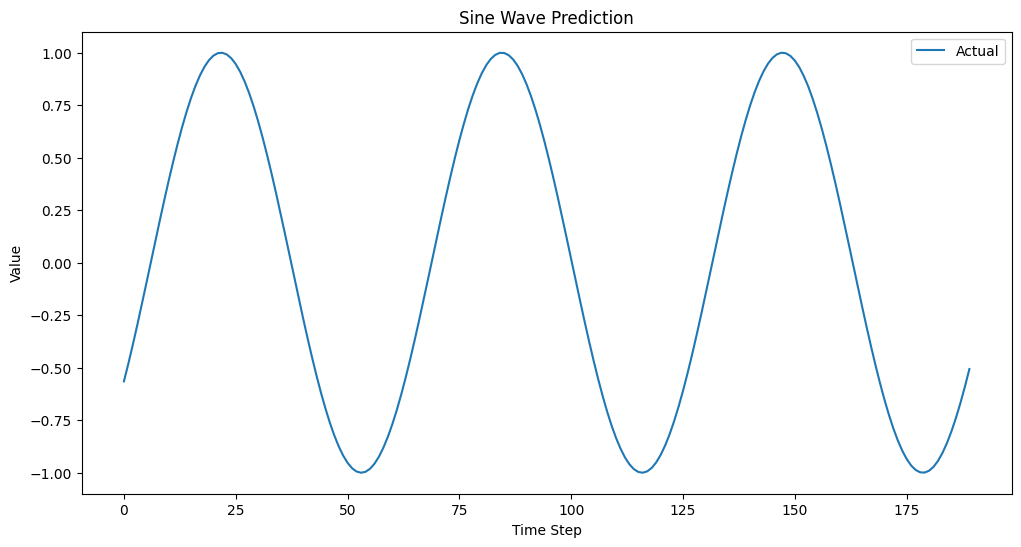

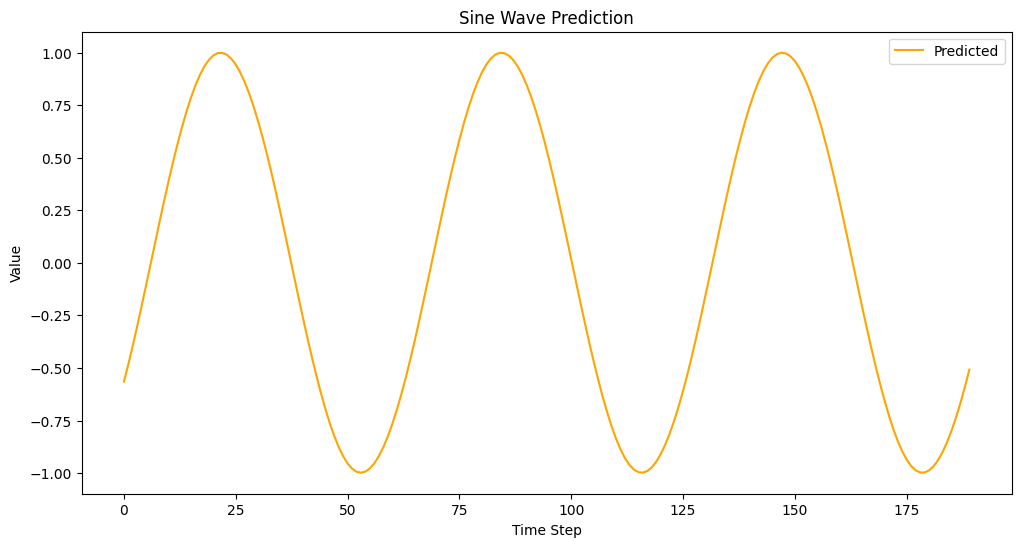

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(time_steps, y_test, label='Actual')
plt.legend()
plt.title('Sine Wave Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time_steps, predictions, label='Predicted', color='orange')
plt.legend()
plt.title('Sine Wave Prediction')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()